In this file I am going to be using the data from [Sadavoy, 2019 paper](https://ui.adsabs.harvard.edu/abs/2019ApJS..245....2S/graphics), eventually recreating Figure 36 for c2d 989/ IRS 63

# Introductory Things

In [1]:
major_color = 'blue'
minor_color = 'red'
carta_major_color = 'darkorange'
carta_minor_color = 'limegreen'

In [2]:
import pandas as pd

In [3]:
%run constants.py

In [4]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/FUNCTIONS/load_functions"

In [5]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/FITS FILES/BAND6/load_band6_data.py"

In [6]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/CARTA FILES/BAND6/load_carta_data_band6.py"

In [7]:
BMAJ_pix, BMIN_pix, BPA_deg_cartesian, reference_length_pix, RA_centre_pix, Dec_centre_pix, xmin, xmax, ymin, ymax = get_plotting_parameters(StokesI_header, StokesI_wcs, 6)

In [8]:
# Call the function
results = generate_polarization_vectors_band6(ny, nx,
                                              RA_centre_pix, Dec_centre_pix,
                                              minor_angle_rad_sky_band6,
                                              StokesI_data_2d_mJy, StokesIerr_data_2d_mJy,
                                              calculated_polarized_intensity, PolarizedIntensity_err_data_2d_mJy,
                                              calculated_polarization_angle_rad, PolarizationAngle_err_data_2d_deg)


In [9]:
# Accessing the actual vector data and angles
vector_data_actual_cartesian = results['vector_data_actual_cartesian']
vector_angle_actual_sky = results['vector_angle_actual_sky']

# Centre point

Centre Point:
    - RA(h,m,s): 16:31:35.657
    - Dec ( $ ^\circ$, ', ''):  −24:01:29.935
    - from [Sadavoy, 2019 paper](https://ui.adsabs.harvard.edu/abs/2019ApJS..245....2S/graphics):

In [10]:
centre_pix = [RA_centre_pix, Dec_centre_pix]

print(f'My centre point: ({RA_centre_pix:.3f} px, {Dec_centre_pix:.3f} px)')
print(f'Carta centre point: (858.123 px, 827.024 px)')

My centre point: (858.000 px, 827.000 px)
Carta centre point: (858.123 px, 827.024 px)


I will make an empty grid of zeros the size of the StokesI fita file, and then plot it based on the xmin and xmax I set for RA and Dec boundaries, and then plot the centre point

In [11]:
gridsize = StokesI_stretched.shape


ones_data = np.ones(shape=gridsize)

In [12]:
# # Create a figure with the WCS projection
# # ------------------------------------------------------------------------------------
# fig, ax = plt.subplots(figsize=(14, 12), subplot_kw={'projection': StokesI_wcs})
# # ------------------------------------------------------------------------------------


# # Add data
# # ------------------------------------------------------------------------------------
# im = ax.imshow(ones_data, 
#                cmap=soft_colormap_v2) 
# # ------------------------------------------------------------------------------------

# # Set x and y limits using ax.set_xlim() and ax.set_ylim()
# # ------------------------------------------------------------------------------------------
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# # ------------------------------------------------------------------------------------------


# # Add line and text for 100 AU 
# # ------------------------------------------------------------------------------------------
# # Plot the line in axes coordinates
# line_x_pos = xmax - 0.05 * (xmax - xmin) # 5% in from the right
# line_y_pos = ymax - 0.1  * (ymax - ymin) # 10% down from the top

# ax.plot([(line_x_pos - reference_length_pix), (line_x_pos)], 
#         [line_y_pos, line_y_pos],
#         color='black', 
#         linewidth=3)

# # Add the text label centered below the line
# ax.text((line_x_pos - reference_length_pix/2), 
#         (line_y_pos - 2), 
#         f'{reference_length_AU} AU', 
#         fontsize=text_fs, 
#         ha='center', 
#         va='top') 
# # ------------------------------------------------------------------------------------


# # Create and add the circular beam to the plot
# # ----------------------------------------------------------------------------------------
# beam_x_pos = xmin - 0.1 * (xmin - xmax) # 10% in from the left
# beam_y_pos = ymin - 0.1 * (ymin - ymax) # 10% up from the bottom

# beam = Ellipse(
#     (beam_x_pos, beam_y_pos),                      
#     width = BMAJ_pix, 
#     height = BMIN_pix,   
#     angle = BPA_deg_cartesian,
#     edgecolor='black',                 # Edge color
#     facecolor='none',                  # Fill color
#     alpha=1,
#     lw = 2)                           # Transparency

# # Add the beam to the plot
# ax.add_patch(beam)
# # ------------------------------------------------------------------------------------



# # Add title and axis labels
# # ------------------------------------------------------------------------------------
# # ax.set_title('Title', fontsize=title_fs, fontweight='bold')
# ax.set_xlabel('Right Ascension', fontsize=axis_label_fs)
# ax.set_ylabel('Declination', fontsize=axis_label_fs)
# # ------------------------------------------------------------------------------------




# # Draw the reference vector line
# # ------------------------------------------------------------------------------------
# vector_x_pos = xmax - 0.05 * (xmax - xmin)  # 5% in from the right
# vector_y_pos = ymin - 0.1 * (ymin - ymax)  # 10% up from the bottom

# ax.plot([(vector_x_pos - max_length_pix * reference_fraction), vector_x_pos], 
#         [vector_y_pos, vector_y_pos],
#         color='black', 
#         linewidth=3)

# # Add the text label centered below the line
# ax.text(vector_x_pos - max_length_pix * reference_fraction / 2,  # Midpoint of the line
#         vector_y_pos - 2,  # Adjusted position below the line
#         f'{reference_fraction * 100:.0f}%',  # Format the fraction as a percentage
#         fontsize=text_fs, 
#         ha='center', 
#         va='top')
# # ------------------------------------------------------------------------------------


# # Adjust ticks and numbers for bottom and left axes
# # ------------------------------------------------------------------------------------
# ax.minorticks_on()

# ax.tick_params(axis="x", which="major", direction="in", bottom=True, top=True, length=7, labelsize=axis_num_fs)
# ax.tick_params(axis="y", which="major", direction="in", left=True, right=True, length=7, labelsize=axis_num_fs)
# # ------------------------------------------------------------------------------------



# # Add the centre point onto the plot
# # ------------------------------------------------------------------------------------
# ax.scatter([RA_centre_pix], 
#            [Dec_centre_pix],
#            color='darkblue', 
#            marker='*', 
#            s=2000)
# # ------------------------------------------------------------------------------------


# # Tight layout and show the plot
# # ------------------------------------------------------------------------------------------
# # plt.tight_layout()
# plt.show()
# # ------------------------------------------------------------------------------------------

# Minor and Major Angles

from [Sadavoy, 2019 paper](https://ui.adsabs.harvard.edu/abs/2019ApJS..245....2S/graphics):

- Position Angle = 148$^\circ$
    - Note: This angle is measured with North being $0^\circ$, East being $90^\circ$

In [13]:
# PA_deg = 148

In [14]:
# The positional angle is the major axis 
major_angle_deg = PA_deg_sky_band6

# The minor axis is 90 degrees from the major
minor_angle_deg = major_angle_deg - 90


plotting_major_angle_deg = astronomy_to_cartesian(major_angle_deg)
plotting_minor_angle_deg = astronomy_to_cartesian(minor_angle_deg) 

# Convert these both to radians
plotting_major_angle_rad = np.radians(plotting_major_angle_deg)
plotting_minor_angle_rad = np.radians(plotting_minor_angle_deg)

plotting_axes_angles_deg = [plotting_major_angle_deg, plotting_minor_angle_deg] 
plotting_axes_angles_rad = [plotting_major_angle_rad, plotting_minor_angle_rad]  

print(f'The major angle is: {major_angle_deg} degrees')
print(f'The minor angle is: {minor_angle_deg} degrees ')

The major angle is: 148 degrees
The minor angle is: 58 degrees 


I want to visualize these angles to ensure I am plotting them correctly

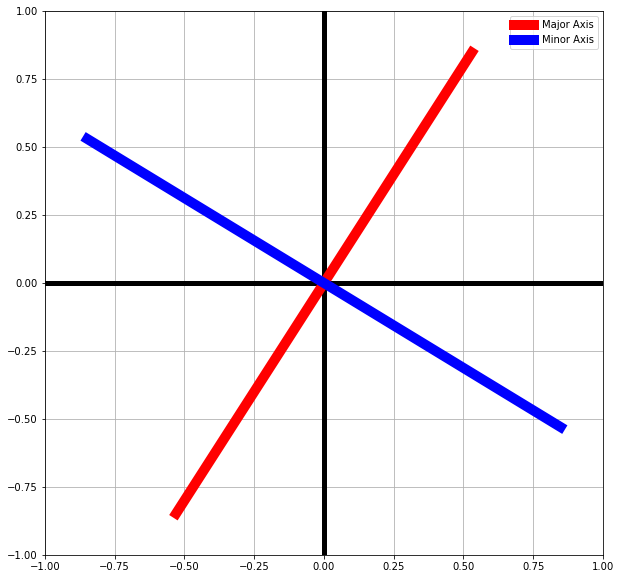

In [15]:
# Corresponding labels for the angles
names = ['Major Axis', 'Minor Axis']  # Including 'BPA' as a label for the last angle

# Colors for each line 
colors = sns.color_palette("hls", len(names)) 

# Length of the lines (can be adjusted as needed)
line_length = 1

# Create the plot with a larger size
plt.figure(figsize=(10, 10))

# Set axis limits to show all four quadrants
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Plot the black axes at x=0 and y=0
plt.axvline(x=0, color='black', linestyle='-', lw=5)
plt.axhline(y=0, color='black', linestyle='-', lw=5)

colors = ['red', 'blue']
# Loop through each angle and plot the corresponding colored line
for i, angle_rad in enumerate(plotting_axes_angles_rad):
    # Convert angle from degrees to radians
    # angle_rad = np.radians(angle_deg)  # Use the angle in degrees for conversion to radians
    
    # Calculate the Cartesian coordinates for the line
    x = line_length * np.cos(angle_rad)
    y = line_length * np.sin(angle_rad)
    
    # Plot the line from (0,0) to (x, y) using the color from the 'colors' array
    plt.plot([-x, x], [-y, y], color=colors[i], label=names[i], lw=10)

# Add grid and legend to the plot
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


# Minor and Major Data Points

In [16]:
line_length_arcsec = 1.4

line_length_pixels = arcsec_to_pixels(StokesI_header, line_length_arcsec)
print(f"Line length in pixels: {line_length_pixels:.2f}")

# This controls the number of points (including the centre) that I want along the axis
num_points_along_axes = len(carta_major_df_StokesI)

Line length in pixels: 77.78


In [17]:
num_points_along_axes

77

In [18]:
# gridsize

In [19]:
# Set the number of pixels I want the line length to be
delta_x = np.abs(xmin - xmax)
delta_y = np.abs(ymin - ymax)

# Generate points along the major axis
major_x = RA_centre_pix  + np.linspace(-line_length_pixels/2, line_length_pixels/2, num_points_along_axes) * np.cos(plotting_major_angle_rad)
major_y = Dec_centre_pix + np.linspace(-line_length_pixels/2, line_length_pixels/2, num_points_along_axes) * np.sin(plotting_major_angle_rad)

# Generate points along the minor axis
minor_x = RA_centre_pix  + np.linspace(-line_length_pixels/2, line_length_pixels/2, num_points_along_axes) * np.cos(plotting_minor_angle_rad)
minor_y = Dec_centre_pix + np.linspace(-line_length_pixels/2, line_length_pixels/2, num_points_along_axes) * np.sin(plotting_minor_angle_rad)

In [20]:
np.linspace(-line_length_pixels/2, line_length_pixels/2, num_points_along_axes)

array([-38.88888889, -37.86549708, -36.84210526, -35.81871345,
       -34.79532164, -33.77192982, -32.74853801, -31.7251462 ,
       -30.70175439, -29.67836257, -28.65497076, -27.63157895,
       -26.60818713, -25.58479532, -24.56140351, -23.5380117 ,
       -22.51461988, -21.49122807, -20.46783626, -19.44444444,
       -18.42105263, -17.39766082, -16.37426901, -15.35087719,
       -14.32748538, -13.30409357, -12.28070175, -11.25730994,
       -10.23391813,  -9.21052632,  -8.1871345 ,  -7.16374269,
        -6.14035088,  -5.11695906,  -4.09356725,  -3.07017544,
        -2.04678363,  -1.02339181,   0.        ,   1.02339181,
         2.04678363,   3.07017544,   4.09356725,   5.11695906,
         6.14035088,   7.16374269,   8.1871345 ,   9.21052632,
        10.23391813,  11.25730994,  12.28070175,  13.30409357,
        14.32748538,  15.35087719,  16.37426901,  17.39766082,
        18.42105263,  19.44444444,  20.46783626,  21.49122807,
        22.51461988,  23.5380117 ,  24.56140351,  25.58

In [21]:
print("RA_centre_pix = ", RA_centre_pix)
print("Dec_centre_pix = ", Dec_centre_pix)

RA_centre_pix =  858
Dec_centre_pix =  827


In [22]:
print(f'Major start: ({major_x[-1]:.3f}, {major_y[-1]:.3f})')
print(f'Major end:   ({major_x[0]:.3f}, {major_y[0]:.3f})')
print(f'Minor start: ({minor_x[-1]:.3f}, {minor_y[-1]:.3f})')
print(f'Minor end:   ({minor_x[0]:.3f}, {minor_y[0]:.3f})')

Major start: (837.392, 794.020)
Major end:   (878.608, 859.980)
Minor start: (825.020, 847.608)
Minor end:   (890.980, 806.392)


Now I want to see how these look on my plot

In [23]:
# # Create a figure with the WCS projection
# # ------------------------------------------------------------------------------------
# fig, ax = plt.subplots(figsize=(14, 12), subplot_kw={'projection': StokesI_wcs})
# # ------------------------------------------------------------------------------------


# # Add data
# # ------------------------------------------------------------------------------------
# im = ax.imshow(ones_data, 
#                cmap=soft_colormap_v2) 
# # ------------------------------------------------------------------------------------

# # Set x and y limits using ax.set_xlim() and ax.set_ylim()
# # ------------------------------------------------------------------------------------------
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# # ------------------------------------------------------------------------------------------


# # Add line and text for 100 AU 
# # ------------------------------------------------------------------------------------------
# # Plot the line in axes coordinates
# line_x_pos = xmax - 0.05 * (xmax - xmin) # 5% in from the right
# line_y_pos = ymax - 0.1  * (ymax - ymin) # 10% down from the top

# ax.plot([(line_x_pos - reference_length_pix), (line_x_pos)], 
#         [line_y_pos, line_y_pos],
#         color='black', 
#         linewidth=3)

# # Add the text label centered below the line
# ax.text((line_x_pos - reference_length_pix/2), 
#         (line_y_pos - 2), 
#         f'{reference_length_AU} AU', 
#         fontsize=text_fs, 
#         ha='center', 
#         va='top') 
# # ------------------------------------------------------------------------------------


# # Create and add the circular beam to the plot
# # ----------------------------------------------------------------------------------------
# beam_x_pos = xmin - 0.1 * (xmin - xmax) # 10% in from the left
# beam_y_pos = ymin - 0.1 * (ymin - ymax) # 10% up from the bottom

# beam = Ellipse(
#     (beam_x_pos, beam_y_pos),                      
#     width = BMAJ_pix, 
#     height = BMIN_pix,   
#     angle = BPA_deg_cartesian,
#     edgecolor='black',                 # Edge color
#     facecolor='none',                  # Fill color
#     alpha=1,
#     lw = 2)                           # Transparency

# # Add the beam to the plot
# ax.add_patch(beam)
# # ------------------------------------------------------------------------------------



# # Add title and axis labels
# # ------------------------------------------------------------------------------------
# # ax.set_title('Title', fontsize=title_fs, fontweight='bold')
# ax.set_xlabel('Right Ascension', fontsize=axis_label_fs)
# ax.set_ylabel('Declination', fontsize=axis_label_fs)
# # ------------------------------------------------------------------------------------


# # Draw the reference vector line
# # ------------------------------------------------------------------------------------
# vector_x_pos = xmax - 0.05 * (xmax - xmin)  # 5% in from the right
# vector_y_pos = ymin - 0.1 * (ymin - ymax)  # 10% up from the bottom

# ax.plot([(vector_x_pos - max_length_pix * reference_fraction), vector_x_pos], 
#         [vector_y_pos, vector_y_pos],
#         color='black', 
#         linewidth=3)

# # Add the text label centered below the line
# ax.text(vector_x_pos - max_length_pix * reference_fraction / 2,  # Midpoint of the line
#         vector_y_pos - 2,  # Adjusted position below the line
#         f'{reference_fraction * 100:.0f}%',  # Format the fraction as a percentage
#         fontsize=text_fs, 
#         ha='center', 
#         va='top')
# # ------------------------------------------------------------------------------------


# # Adjust ticks and numbers for bottom and left axes
# # ------------------------------------------------------------------------------------
# ax.minorticks_on()

# ax.tick_params(axis="x", which="major", direction="in", bottom=True, top=True, length=7, labelsize=axis_num_fs)
# ax.tick_params(axis="y", which="major", direction="in", left=True, right=True, length=7, labelsize=axis_num_fs)
# # ------------------------------------------------------------------------------------



# # Add the centre point onto the plot
# # ------------------------------------------------------------------------------------
# ax.scatter([RA_centre_pix], 
#            [Dec_centre_pix],
#            color='darkblue', 
#            marker='*', 
#            s=2000)
# # ------------------------------------------------------------------------------------


# # # Add minor and major axes
# # plt.plot(major_x, major_y, 'r-', lw = 5, label='Major Axis')
# # plt.plot(minor_x, minor_y, 'b-', lw = 5, label='Minor Axis')

# # Scatter plot for major and minor axes
# plt.scatter(major_x, major_y, color=major_color, label='Major Axis', s=1, marker = 'o')  # red points for the major axis
# plt.scatter(minor_x, minor_y, color=minor_color, label='Minor Axis', s=1, )  # blue points for the minor axis

# # plt.plot(major_x, major_y, color=major_color, label='Major Axis', lw=1)
# # plt.plot(minor_x, minor_y, color=minor_color, label='Minor Axis', lw=1)

# # Tight layout and show the plot
# # ------------------------------------------------------------------------------------------
# # plt.tight_layout()
# plt.show()
# # ------------------------------------------------------------------------------------------

In [24]:
# # Create a figure with the WCS projection
# # ------------------------------------------------------------------------------------
# fig, ax = plt.subplots(figsize=(14, 12))# , subplot_kw={'projection': StokesI_wcs})
# # ------------------------------------------------------------------------------------


# # Add data
# # ------------------------------------------------------------------------------------
# im = ax.imshow(ones_data, 
#                cmap=soft_colormap_v2) 
# # ------------------------------------------------------------------------------------

# # Set x and y limits using ax.set_xlim() and ax.set_ylim()
# # ------------------------------------------------------------------------------------------
# # (xmin, xmax) = (787, 924)
# # (ymin, ymax) = (756, 895)
# step = 40
# ax.set_xlim(RA_centre_pix - step, RA_centre_pix + step)
# ax.set_ylim(Dec_centre_pix - step, Dec_centre_pix + step)
# # ------------------------------------------------------------------------------------------



# # Create and add the circular beam to the plot
# # ----------------------------------------------------------------------------------------
# beam_x_pos = xmin - 0.1 * (xmin - xmax) # 10% in from the left
# beam_y_pos = ymin - 0.1 * (ymin - ymax) # 10% up from the bottom

# beam = Ellipse(
#     (beam_x_pos, beam_y_pos),                      
#     width = BMAJ_pix, 
#     height = BMIN_pix,   
#     angle = BPA_deg_cartesian,
#     edgecolor='black',                 # Edge color
#     facecolor='none',                  # Fill color
#     alpha=1,
#     lw = 2)                           # Transparency

# # Add the beam to the plot
# ax.add_patch(beam)
# # ------------------------------------------------------------------------------------



# # Add title and axis labels
# # ------------------------------------------------------------------------------------
# # ax.set_title('Title', fontsize=title_fs, fontweight='bold')
# ax.set_xlabel('Right Ascension', fontsize=axis_label_fs)
# ax.set_ylabel('Declination', fontsize=axis_label_fs)
# # ------------------------------------------------------------------------------------


# # Adjust ticks and numbers for bottom and left axes
# # ------------------------------------------------------------------------------------
# ax.minorticks_on()

# ax.tick_params(axis="x", which="major", direction="in", bottom=True, top=True, length=7, labelsize=axis_num_fs)
# ax.tick_params(axis="y", which="major", direction="in", left=True, right=True, length=7, labelsize=axis_num_fs)
# # ------------------------------------------------------------------------------------



# # Add the centre point onto the plot
# # ------------------------------------------------------------------------------------
# ax.scatter([RA_centre_pix], 
#            [Dec_centre_pix],
#            color='darkblue', 
#            marker='*', 
#            s=2000)
# # ------------------------------------------------------------------------------------


# # # Add minor and major axes
# # plt.plot(major_x, major_y, 'r-', lw = 5, label='Major Axis')
# # plt.plot(minor_x, minor_y, 'b-', lw = 5, label='Minor Axis')

# # Scatter plot for major and minor axes
# plt.scatter(major_x, major_y, color=major_color, label='Major Axis', s=1, marker = 'o')  # red points for the major axis
# plt.scatter(minor_x, minor_y, color=minor_color, label='Minor Axis', s=1, marker = 'o')  # blue points for the minor axis

# colors = sns.color_palette("Set2", 4)

# #plt.scatter(major_x[0],  major_y[0],  s = 300, marker = 's', label = 'First Major Point', color= colors[0])
# #plt.scatter(major_x[-1], major_y[-1], s = 300, marker = 's', label = 'Last Major Point', color= colors[1])
# # plt.scatter(minor_x[0],  minor_y[0],  s = 300, marker = 's', label = 'First Minor Point', color= colors[2])
# # plt.scatter(minor_x[-1], minor_y[-1], s = 300, marker = 's', label = 'Last Minor Point', color= colors[3])

# plt.legend()

# # plt.plot(major_x, major_y, color=major_color, label='Major Axis', lw=1)
# # plt.plot(minor_x, minor_y, color=minor_color, label='Minor Axis', lw=1)

# # Tight layout and show the plot
# # ------------------------------------------------------------------------------------------
# # plt.tight_layout()
# plt.show()
# # ------------------------------------------------------------------------------------------

# Stokes I Slices

We want to extract the data of StokesI and polarized intensity along the minor and major axes

In [25]:
# def extract_axis_data(axis_x, axis_y, data_2d, minor_or_major, centre_pix, gridsize, header):
#     """
#     Extracts data along a specified axis (major or minor) and returns the data along with valid positions.

#     Parameters:
#     - axis_x: Array of x positions along the axis (e.g., major_x or minor_x)
#     - axis_y: Array of y positions along the axis (e.g., major_y or minor_y)
#     - data_2d: 2D array representing the data (e.g., StokesI_data_2d_mJy)
#     - centre_pix: Tuple (RA_centre_pix, Dec_centre_pix) specifying the center pixel position
#     - gridsize: Tuple representing the dimensions of the grid (data_2d.shape)
#     - header: FITS header to extract the plate scale for arcsecond conversion

#     Returns:
#     - axis_data: List of extracted data values
#     - offset_pixels: List of pixel offsets (positive and negative)
#     - offset_arcsec: List of arcsecond offsets (positive and negative)
#     """
#     axis_data = []
#     offset_pixels = []
#     offset_arcsec = []

#     RA_centre_pix, Dec_centre_pix = centre_pix  # Unpack center coordinates

#     # Extract pixel scale from header (arcsec per pixel)
#     if 'CDELT1' in header:
#         pixel_scale_arcsec = abs(header['CDELT1']) * 3600  # Convert degrees to arcsec
#     elif 'CD1_1' in header:
#         pixel_scale_arcsec = abs(header['CD1_1']) * 3600  # Alternative plate scale
#     else:
#         raise ValueError("Could not determine plate scale from FITS header.")

#     for i in range(len(axis_x)):
#         # Round to nearest integer for pixel indexing
#         xi, yi = int(round(axis_x[i])), int(round(axis_y[i]))

#         # Ensure indices are within bounds
#         if 0 <= xi < gridsize[1] and 0 <= yi < gridsize[0]:
#             # Extract data
#             axis_data.append(data_2d[yi, xi])

#             # Compute pixel offsets
#             delta_x = xi - RA_centre_pix
#             delta_y = yi - Dec_centre_pix
#             offset_pixel = np.sqrt(delta_x**2 + delta_y**2)
            
#             # Determine offset based on 'major' or 'minor'
#             if minor_or_major == 'major':
#                 # If both delta_x and delta_y are negative, the offset is negative
#                 if delta_x < 0: #and delta_y < 0:
#                     offset_pixels.append(offset_pixel)  # Negative offset in pixels
#                     offset_arcsec.append(offset_pixel * pixel_scale_arcsec)  # Negative offset in arcseconds
#                 else:
#                     offset_pixels.append(-offset_pixel)  # Positive offset in pixels
#                     offset_arcsec.append(-offset_pixel * pixel_scale_arcsec)  # Positive offset in arcseconds

#             elif minor_or_major == 'minor':
#                 # If delta_x is negative, the offset is negative
#                 if delta_x < 0:
#                     offset_pixels.append(offset_pixel)  # Negative offset in pixels
#                     offset_arcsec.append(offset_pixel * pixel_scale_arcsec)  # Negative offset in arcseconds
#                 else:
#                     offset_pixels.append(-offset_pixel)  # Positive offset in pixels
#                     offset_arcsec.append(-offset_pixel * pixel_scale_arcsec)  # Positive offset in arcseconds


#     return axis_data, offset_pixels, offset_arcsec

In [26]:
# Call the function for the minor axis in Stokes I
major_data_StokesI, major_offset_pixels_StokesI, major_offset_arcsec_StokesI = extract_axis_data(
    major_x, major_y, StokesI_data_2d_mJy, 'major', centre_pix, gridsize, StokesI_header)

In [27]:
# Call the function for the minor axis in Stokes I
minor_data_StokesI, minor_offset_pixels_StokesI, minor_offset_arcsec_StokesI = extract_axis_data(
    minor_x, minor_y, StokesI_data_2d_mJy, 'minor', centre_pix, gridsize, StokesI_header)

In [28]:
# Call the function for the major axis in PI
major_data_POLI, major_offset_pixels_POLI, major_offset_arcsec_POLI = extract_axis_data(
    major_x, major_y, PolarizedIntensity_data_2d_mJy, 'major', centre_pix, gridsize, StokesI_header)

In [29]:
# Call the function for the minor axis in PI
minor_data_POLI, minor_offset_pixxels_POLI, minor_offset_arcsec_POLI = extract_axis_data(
    minor_x, minor_y, PolarizedIntensity_data_2d_mJy, 'minor', centre_pix, gridsize, StokesI_header)

# Plots

## Plotting Stokes I

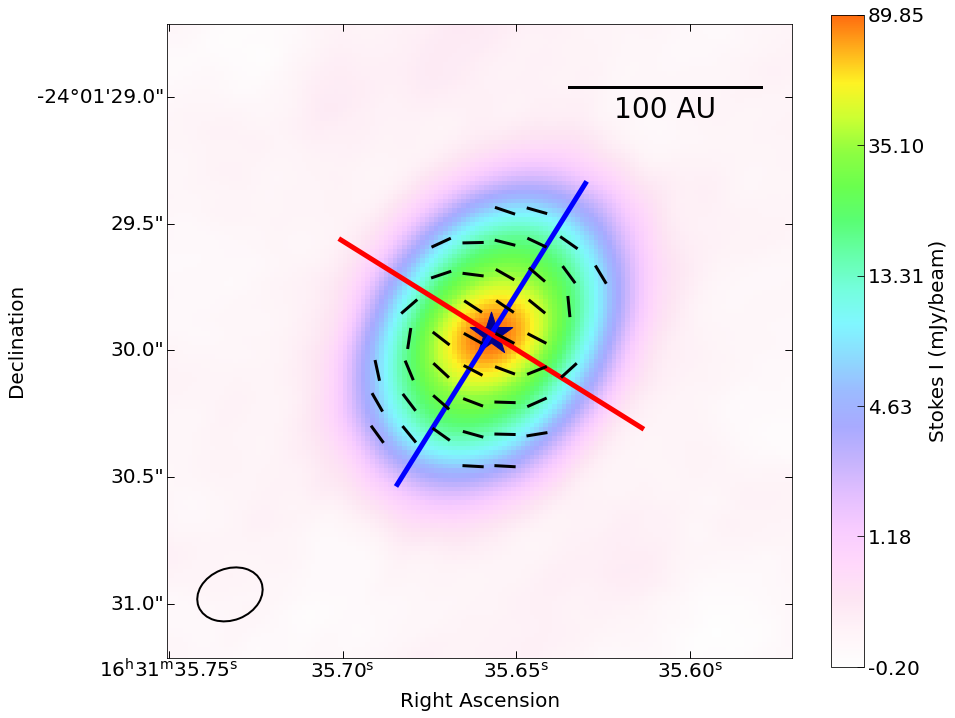

In [30]:
fig, ax = create_stokes_i_base_plot(StokesI_wcs, StokesI_stretched, 
                                    soft_colormap_no_red,
                                    normalized_cbar_ticks, StokesI_unstretched_cbar_ticks,  
                                    xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                                    BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                                    max_length_pix, reference_fraction)

# Add minor and major axes
plt.plot(major_x, major_y, major_color, lw = 5, label='Major Axis')
plt.plot(minor_x, minor_y, minor_color, lw = 5, label='Minor Axis')


# Add the centre point onto the plot
# ------------------------------------------------------------------------------------
ax.scatter([RA_centre_pix], 
           [Dec_centre_pix],
           color='darkblue', 
           marker='*', 
           s=2000)
# ------------------------------------------------------------------------------------



# Plot vector data on the first subplot (axes[0, 0])
for row in vector_data_actual_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw = 3, label = 'Real')

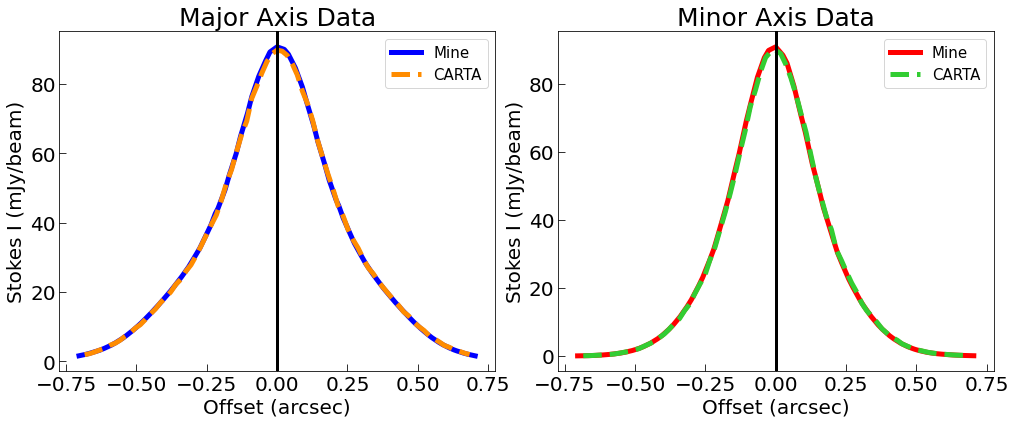

In [31]:
ax = plot_slices_along_axes(
    major_data_StokesI,
    minor_data_StokesI,
    carta_major_data_mJy_StokesI,
    carta_minor_data_mJy_StokesI,
    major_offset_arcsec_StokesI,
    minor_offset_arcsec_StokesI,
    carta_major_offset_StokesI,
    carta_minor_offset_StokesI,
    y_label="Stokes I (mJy/beam)",
    type_of_plot="Line"  # "Line" or "Scatter"
)

## Polarized Intensity Plot

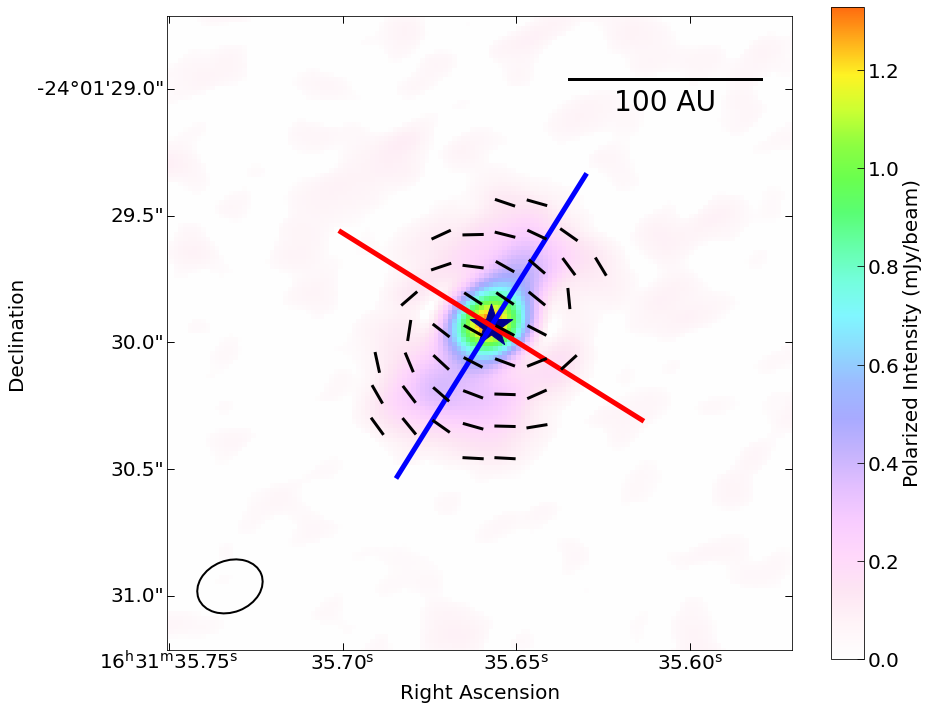

In [32]:
fig, ax = create_base_plot(StokesI_wcs, PolarizedIntensity_data_2d_mJy, 'Polarized Intensity (mJy/beam)',
                           soft_colormap_no_red, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

# Add minor and major axes
plt.plot(major_x, major_y, major_color, lw = 5, label='Major Axis')
plt.plot(minor_x, minor_y, minor_color, lw = 5, label='Minor Axis')


# Add the centre point onto the plot
# ------------------------------------------------------------------------------------
ax.scatter([RA_centre_pix], 
           [Dec_centre_pix],
           color='darkblue', 
           marker='*', 
           s=2000)
# ------------------------------------------------------------------------------------



# Plot vector data on the first subplot (axes[0, 0])
for row in vector_data_actual_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw = 3, label = 'Real')

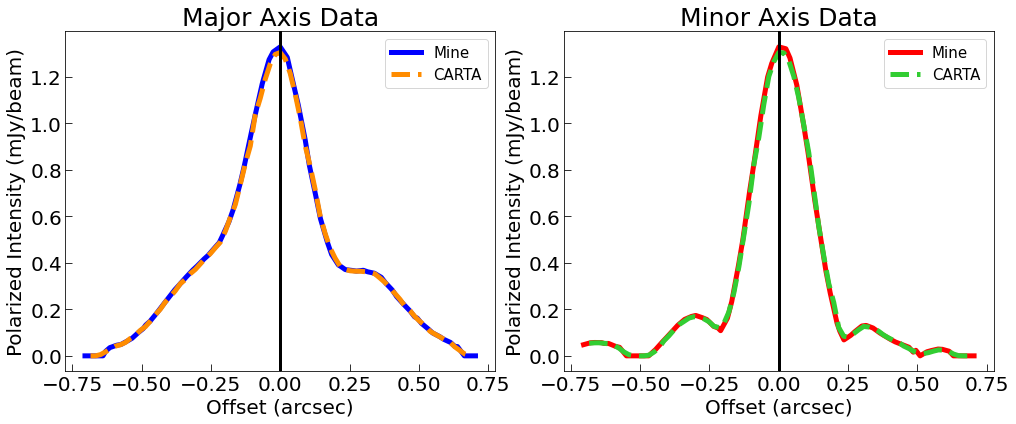

In [33]:
ax = plot_slices_along_axes(
    major_data_POLI,
    minor_data_POLI,
    carta_major_data_mJy_POLI,
    carta_minor_data_mJy_POLI,
    major_offset_arcsec_POLI,
    minor_offset_arcsec_POLI,
    carta_major_offset_POLI,
    carta_minor_offset_POLI,
    y_label="Polarized Intensity (mJy/beam)",
    type_of_plot="Line"  # "Line" or "Scatter"
)